In [122]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from eigsep_corr import io
%matplotlib widget

In [102]:
path = '/home/dominiv/eigsep/data/july2025/rfsoc_temp_test/'
no_fan = 'no_fan/*'
fan = 'fan/*'
temp = 'temp_no_fan/temp_data.npy'
files = sorted(glob.glob(path+no_fan))
fan_files = sorted(glob.glob(path+fan))
print(len(files))

33


In [104]:
temps = np.load(path+temp, allow_pickle=True)
no_fan = io.read_file(files[0])


# temperature = [d['temperature1'] for d in temps]
data = []
times = []

fan = []
fan_times = []

for i in range(len(fan_files)):
    _, read = io.read_file(fan_files[i])
    spec = read['0'][:, 0, :, 0]
    fan.append(spec)

for i in range(len(fan_files)):
    read, _ = io.read_file(fan_files[i])
    time = read['times']
    fan_times.append(time)

for i in range(len(files)):
    _, read = io.read_file(files[i])
    spec = read['0'][:, 0, :, 0]
    data.append(spec)

for i in range(len(files)):
    read, _ = io.read_file(files[i])
    time = read['times']
    times.append(time)

data = np.array(data)
times = np.array(times)

fan = np.array(fan)
fan_times = np.array(fan_times)

In [117]:
print(data[4:].shape)
print(fan.shape)

(29, 60, 1024)
(29, 60, 1024)


In [5]:
nchan = no_fan[0]['nchan']
sample_rate = no_fan[0]['sample_rate']
freqs = no_fan[0]['freqs']
# times = no_fan[0]['times']

spec = no_fan[1]
spec.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '02', '04', '24', '13', '15', '35'])

In [8]:
temps[0].keys()

dict_keys(['status', 'app_id', 'temperature1', 'temperature1_gpio', 'conversion_time1', 'sensor_error1', 'temperature2', 'temperature2_gpio', 'conversion_time2', 'sensor_error2'])

In [7]:
temperature = [d['temperature1'] for d in temps]
temp_time = [d['conversion_time1'] for d in temps]
# temperature

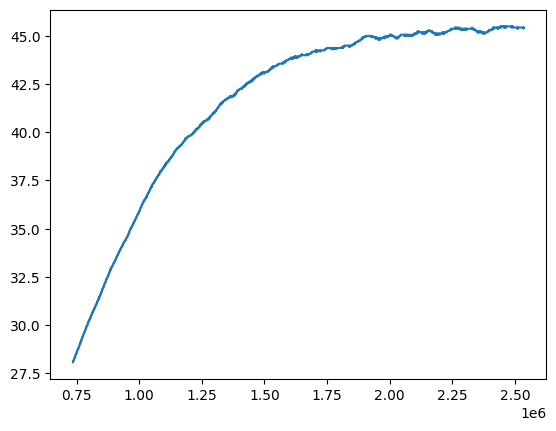

In [8]:
plt.figure()
plt.plot(temp_time, temperature)
plt.show()

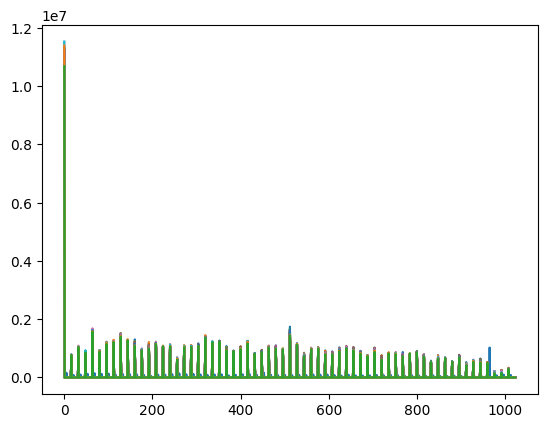

In [9]:
plt.figure()
for i in range(len(files)):
    plt.plot(data[i, 0])
# plt.plot(data[0,0])
plt.show()

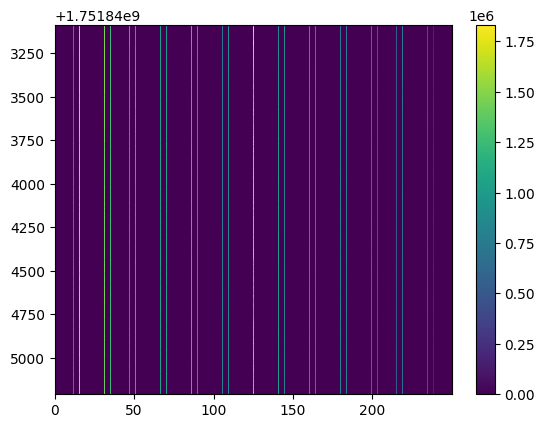

In [46]:
data_stack = np.concatenate(data, axis=0)
times_stack = np.concatenate(times, axis=0)



plt.figure()
plt.imshow((data_stack[1:, 1:]), aspect = 'auto', interpolation='none', extent = [freqs[0]/1e6, freqs[-1]/1e6, times_stack[-1], times_stack[0]],
           origin='upper', cmap='viridis')
plt.colorbar()
plt.show()

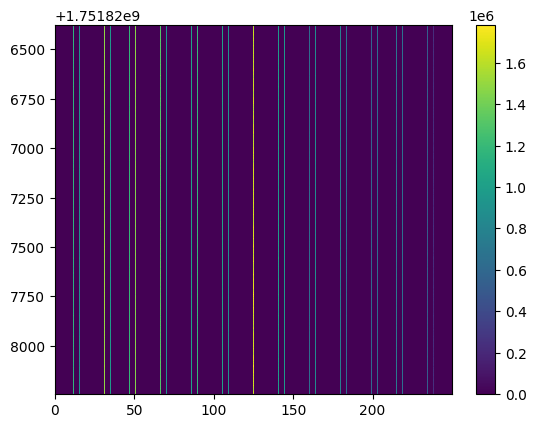

In [107]:

fan_stack = np.concatenate(fan, axis=0)
fan_times_stack = np.concatenate(fan_times, axis=0)

plt.figure()
plt.imshow((fan_stack[1:, 1:]), aspect = 'auto', interpolation='none', extent = [freqs[0]/1e6, freqs[-1]/1e6, fan_times_stack[-1], fan_times_stack[0]],
           origin='upper', cmap='viridis')
plt.colorbar()
plt.show()

/tmp/ipykernel_19179/3145679481.py:2: RuntimeWarning: invalid value encountered in divide
  pct = np.where(data_stack[1] != 0, ((data_stack[-1] - data_stack[1]) / data_stack[1]) * 100, 0)


(1024,)


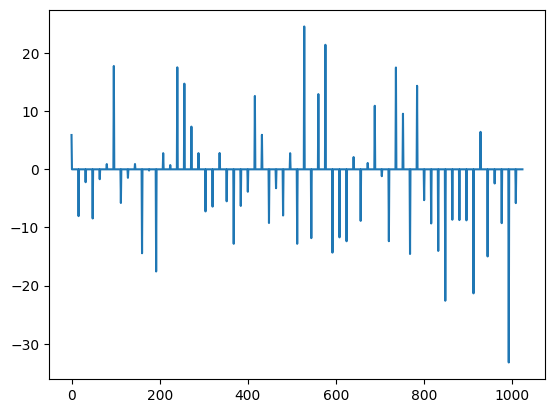

In [81]:
perc = (data_stack[1][np.where(data_stack[1] != 0)] - data_stack[-1][np.where(data_stack[-1] != 0)]) / (data_stack[1][np.where(data_stack[1] != 0)]) * 100
pct = np.where(data_stack[1] != 0, ((data_stack[-1] - data_stack[1]) / data_stack[1]) * 100, 0)

print(pct.shape)
plt.figure()
# plt.plot(data_stack[-1])
# plt.plot(data_stack[1])
# plt.plot(abs(data_stack[1] - data_stack[-1]))
plt.plot(pct)
plt.show()

In [76]:
print(np.where(data_stack[0] != 0)[0].shape)

print(np.where(data_stack[-1] != 0)[0].shape)

print(np.where(data_stack[-1] != 0)[0] == np.where(data_stack[1] != 0)[0])

print(np.where(data_stack[-1] != 0)[0])

(128,)
(64,)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[   0   16   32   48   64   80   96  112  128  144  160  176  192  208
  224  240  256  272  288  304  320  336  352  368  384  400  416  432
  448  464  480  496  512  528  544  560  576  592  608  624  640  656
  672  688  704  720  736  752  768  784  800  816  832  848  864  880
  896  912  928  944  960  976  992 1008]


In [17]:

for i in range(33*60):
    print(np.where(data_stack[i] != 0)[0].shape)

(128,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64

In [79]:
stride = (len(temp_time) - 1) / (len(times_stack) - 1)

idxs   = np.floor(stride * np.arange(len(times_stack))).astype(int)
# idxs will run from 0 up to N-1 without ever hitting N

aligned_temptime = np.array(temp_time)[idxs]

aligned_temp = np.array(temperature)[idxs]
print(aligned_temp.shape)
print(data_stack[:,16].shape)

(1980,)
(1980,)


823521


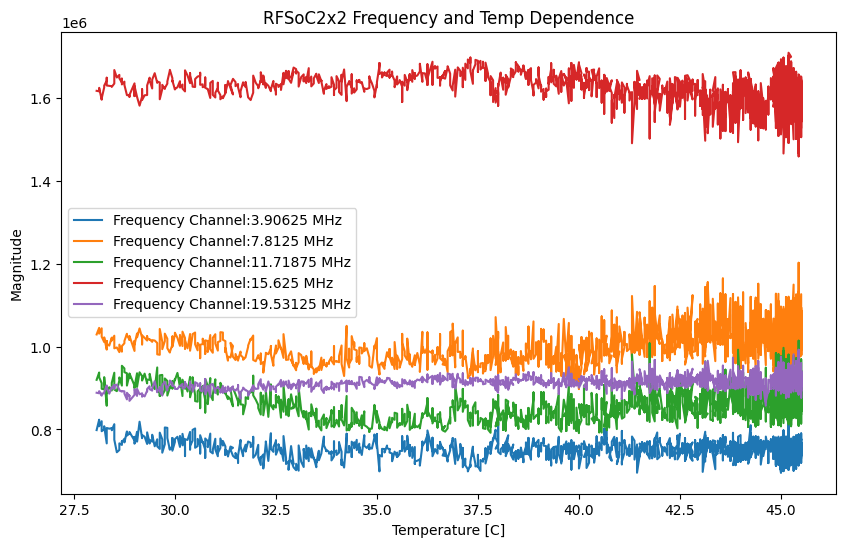

In [100]:
print(data_stack[1, 16])

first_ind = 1
last_ind = 6
peaks = np.where(data_stack[1] != 0)[0][first_ind:last_ind]



plt.figure(figsize=(10,6))
for i in peaks:
    plt.plot(aligned_temp, data_stack[:, i], label = f'Frequency Channel:{freqs[i]/1e6} MHz')
# plt.plot(aligned_temp, data_stack[:, 16])
plt.title('RFSoC2x2 Frequency and Temp Dependence')
plt.xlabel('Temperature [C]')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

663975


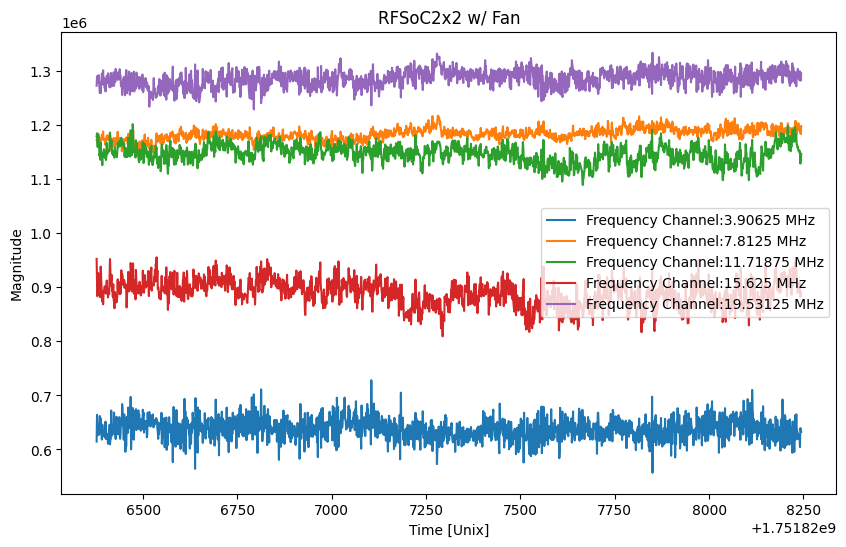

In [116]:

print(fan_stack[1, 16])

first_ind = 1
last_ind = 6
peaks = np.where(data_stack[1] != 0)[0][first_ind:last_ind]



plt.figure(figsize=(10,6))
for i in peaks:
    plt.plot(fan_times_stack, fan_stack[:, i], label = f'Frequency Channel:{freqs[i]/1e6} MHz')
# plt.plot(aligned_temp, data_stack[:, 16])
plt.title('RFSoC2x2 w/ Fan')
plt.xlabel('Time [Unix]')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

/tmp/ipykernel_19179/2624142278.py:4: RuntimeWarning: invalid value encountered in divide
  temp_diff = ((data_cut - fan_stack) / fan_stack) * 100


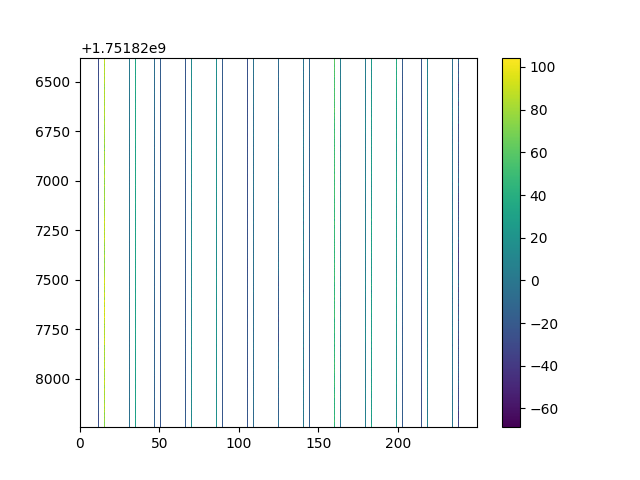

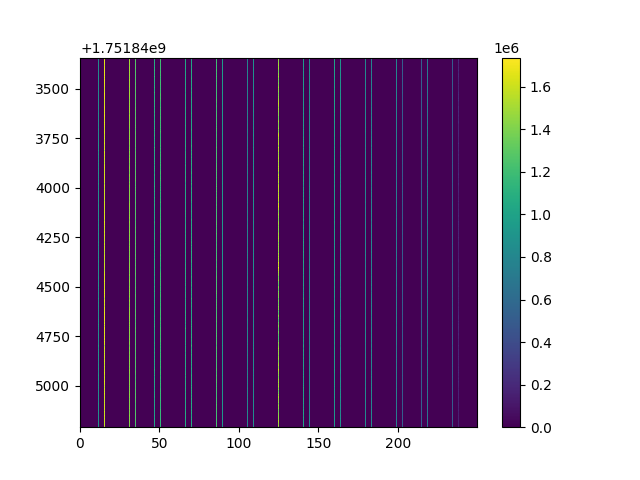

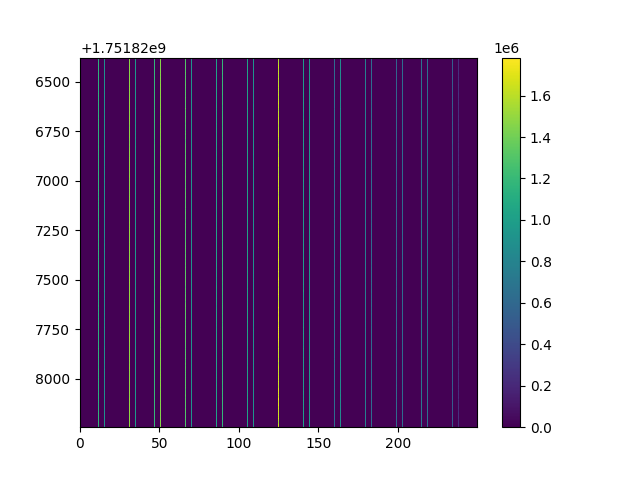

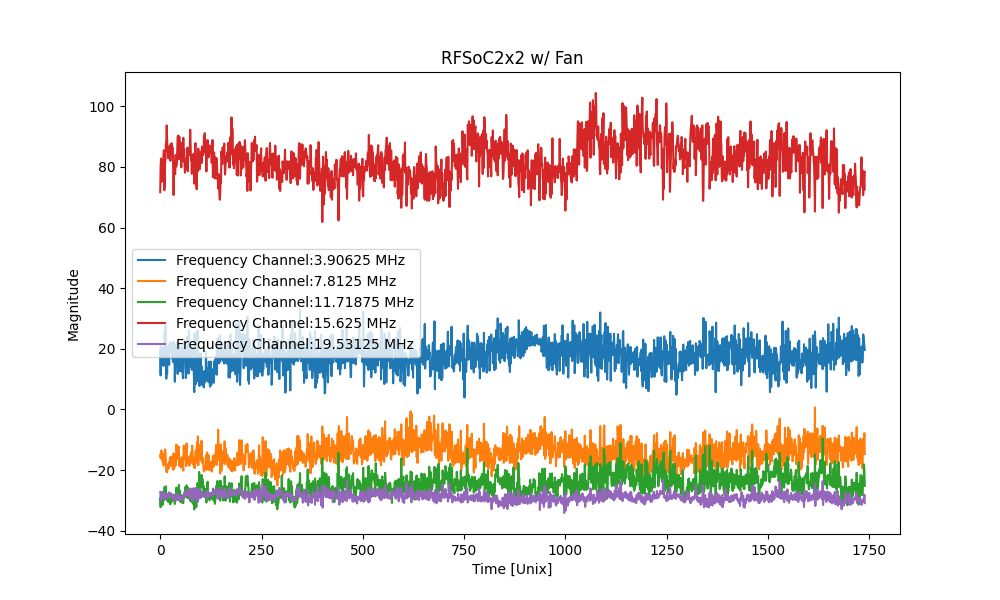

In [128]:
data_cut = np.concatenate(data[4:], axis=0)
times_cut = np.concatenate(times[4:], axis=0)

temp_diff = ((data_cut - fan_stack) / fan_stack) * 100


# pct = np.where(data_cut != 0, ((data_cut - fan_stack) / fan_stack) * 100, 0)

plt.figure()
plt.imshow((temp_diff[1:, 1:]), aspect = 'auto', interpolation='none', extent = [freqs[0]/1e6, freqs[-1]/1e6, fan_times_stack[-1], fan_times_stack[0]],
           origin='upper', cmap='viridis')
plt.colorbar()
plt.show()
plt.figure()
plt.imshow((data_cut[1:, 1:]), aspect = 'auto', interpolation='none', extent = [freqs[0]/1e6, freqs[-1]/1e6, times_cut[-1], times_cut[0]],
           origin='upper', cmap='viridis')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow((fan_stack[1:, 1:]), aspect = 'auto', interpolation='none', extent = [freqs[0]/1e6, freqs[-1]/1e6, fan_times_stack[-1], fan_times_stack[0]],
           origin='upper', cmap='viridis')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,6))
for i in peaks:
    plt.plot(temp_diff[:, i], label = f'Frequency Channel:{freqs[i]/1e6} MHz')
# plt.plot(aligned_temp, data_stack[:, 16])
plt.title('RFSoC2x2 w/ Fan')
plt.xlabel('Time [Unix]')
plt.ylabel('Magnitude')
plt.legend()
plt.show()